In [75]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# CZY JA TO MUSZĘ KOMENTOWAĆ?
global hal, sa, kub, default_od
hal = "Halszka Kościelska"
sa = "Sandra Mleczak"
kub = "Jakub Markil"

print(f"Autorzy:\n{hal},\n{kub},\n{sa}")

Autorzy:
Halszka Kościelska,
Jakub Markil,
Sandra Mleczak


In [2]:
file = "LOL.csv"

dane = pd.read_csv(file)

kolumny = list(dane.columns)

indexes = list(dane.index)

role = pd.read_csv("role.csv")
length = range(len(indexes))

In [96]:
role

,Primary_Role,amount
0,Fighter,43
1,Mage,35
2,Marksman,27
3,Tank,22
4,Assassin,18
5,Support,16


In [135]:
dane["Primary_Location"] = dane["Primary_Location"].str.replace('bottom', 'Bottom')

prim_loc = dane["Primary_Location"]
prim_role = dane["Primary_Role"]
attck = dane["Attack_Damage"]
move_spd = dane["Movement_Speed"]
rang = dane["Range"]

variables = [prim_loc, prim_role, attck, move_spd, rang]
prim_loc.unique()

array(['Top', 'Mid', 'Support', 'Jungle', 'Bottom'], dtype=object)

In [136]:
prim_loc

0          Top
1          Mid
2          Mid
3          Mid
4      Support
        ...   
156     Bottom
157        Mid
158    Support
159        Mid
160    Support
Name: Primary_Location, Length: 161, dtype: object

In [150]:
descr = [var.describe() for var in variables]
descr_DF = [pd.DataFrame(desc) for desc in descr]

# for x in descr_DF: print(x, '\n')

Wybrane dane:
<ul>
    <li> primary_role </li>
    <li> primary_location </li>
    <li> attack_damage </li>
    <li> movement_speed </li>
    <li> range </li>
</ul>
Robimy korelacje typu:
<ul>
    <li> primary_role - primary_location </li>
    <li> attack_damage - movement_speed </li>
    <li> attack_damage - range </li>
</ul>

In [81]:
rval1, pval1 = st.pearsonr(attck, move_spd)

['Assassin', 'Fighter', 'Mage', 'Marksman', 'Support', 'Tank'] 



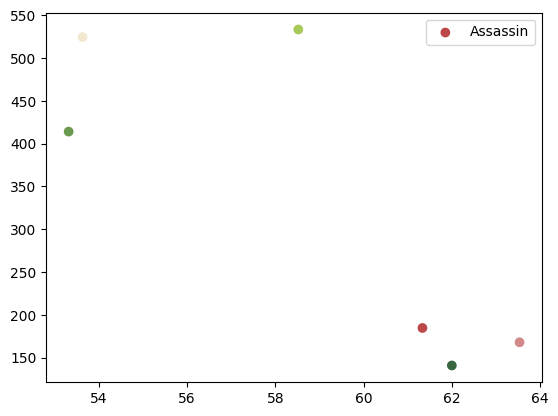

In [231]:
plt.

In [80]:
rval2, pval2 = st.pearsonr(attck, rang)
print(rval2)
print(pval2)

-0.644330634172071
2.9312944832799394e-20


In [102]:
temp_loc = prim_loc.str.replace("Support", "Bottom")
chitab = pd.crosstab(prim_role, temp_loc)
chi = st.chi2_contingency([chitab["Bottom"], chitab["Jungle"], chitab["Mid"], chitab["Top"]])
print(chitab, "\n")
for x in chi: print(x)

Primary_Location  Bottom  Jungle  Mid  Top
Primary_Role                              
Assassin               0       9    9    0
Fighter                1      13    1   28
Mage                   7       2   25    1
Marksman              21       2    2    2
Support               14       1    0    1
Tank                   7       6    1    8 

175.19158180316606
2.2115994584468294e-29
15
[[ 5.59006211 13.35403727 10.86956522  8.38509317  4.9689441   6.83229814]
 [ 3.68944099  8.8136646   7.17391304  5.53416149  3.27950311  4.50931677]
 [ 4.2484472  10.14906832  8.26086957  6.37267081  3.77639752  5.19254658]
 [ 4.47204969 10.68322981  8.69565217  6.70807453  3.97515528  5.46583851]]


In [94]:
chitab

Primary_Location,Bottom,Jungle,Mid,Top
Primary_Role,,,,
Assassin,0,9,9,0
Fighter,1,13,1,28
Mage,7,2,25,1
Marksman,21,2,2,2
Support,14,1,0,1
Tank,7,6,1,8


In [141]:
role_count = prim_role.value_counts()

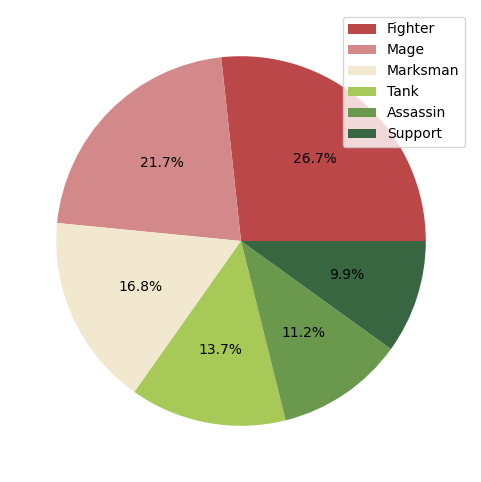

In [191]:
kolorki = ["#BC4749", "#D38889", "#F2E8CF", '#A7C957', '#6A994E', '#386641']
plt.figure(1, figsize = (6,6))
plt.pie(role_count, autopct='%1.1f%%', colors=kolorki)
plt.legend(labels = role_count.index)
# plt.title('Główne role')
# plt.savefig("roles.png")
plt.show()

In [140]:
loc_count = dane.groupby('Primary_Location')['Primary_Location'].count()

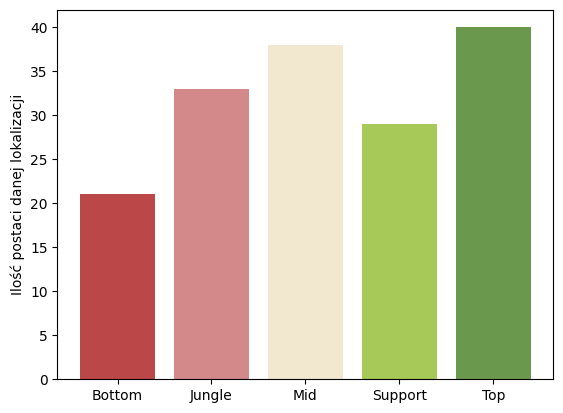

In [190]:
plt.bar(loc_count.index, loc_count, color=kolorki)
plt.ylabel('Ilość postaci danej lokalizacji')
# plt.title('Główne lokacje')
# plt.savefig("locations.png")
plt.show()

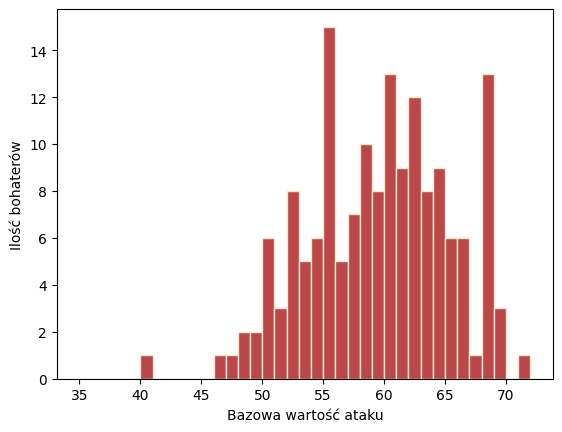

In [189]:
plt.hist(attck, bins=range(35,73), color=kolorki[0], edgecolor=kolorki[2])
plt.xlabel("Bazowa wartość ataku")
plt.ylabel("Ilość bohaterów")
# plt.title('Rozkład zmiennej "Attack Damage"')
# plt.savefig('attck_histo.png')
plt.show()

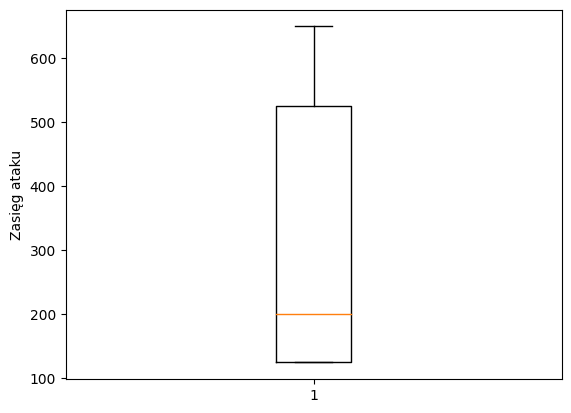

In [178]:
plt.boxplot(rang)
plt.ylabel("Zasięg ataku")
# plt.savefig("boxplot.png")
plt.show()

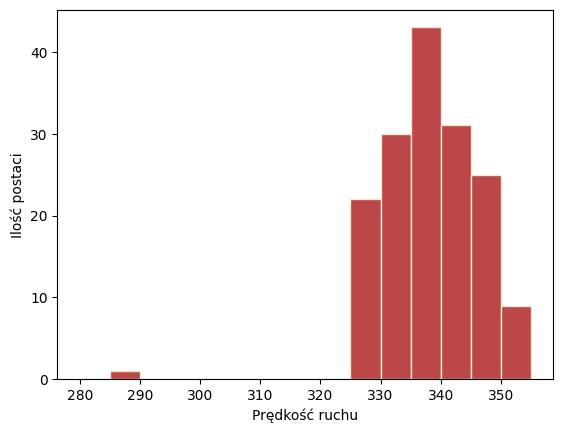

In [188]:
plt.hist(move_spd, bins=range(280,360,5), color=kolorki[0], edgecolor=kolorki[2])
plt.xlabel("Prędkość ruchu")
plt.ylabel("Ilość postaci")
# plt.savefig("movespd_hist.png")
plt.show()

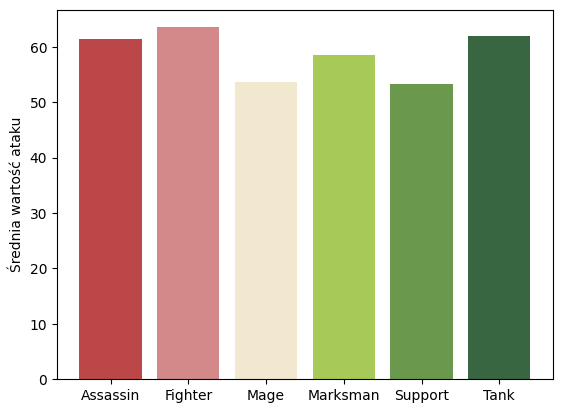

In [241]:
temp = dane.groupby('Primary_Role')['Attack_Damage'].mean()
attack_role = temp.reset_index()
plt.bar(attack_role.Primary_Role, attack_role.Attack_Damage, color=kolorki)
plt.ylabel("Średnia wartość ataku")
# plt.savefig("attck_mean.png")
plt.show()

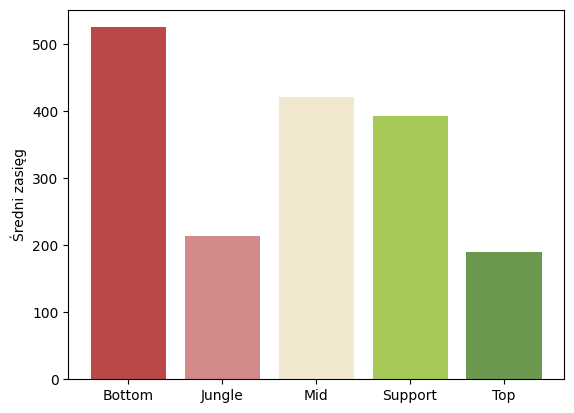

In [244]:
temp = dane.groupby('Primary_Location')['Range'].mean()
range_loc = temp.reset_index()
plt.bar(range_loc.Primary_Location, range_loc.Range, color=kolorki)
plt.ylabel("Średni zasięg")
plt.savefig("range_loc.png")
plt.show()